## El Problema del Cartero: El Viajante 
<br>
<br>

---
#### Descripción del Problema
Imaginemos que un cartero tiene que entregar cartas a varias casas en un pueblo. El cartero comienza en su oficina (Casa 1) y debe visitar cada una de las casas del pueblo exactamente una vez. El objetivo es que el cartero recorra todas las casas de manera eficiente, minimizando el costo total de desplazamiento (ya sea distancia, tiempo o coste asociado).

#### Mapa del Pueblo
Las casas están representadas como nodos en un grafo, y las rutas entre las casas son las aristas del grafo. El coste de cada ruta entre dos casas puede estar basado en la distancia entre ellas. El cartero debe buscar la ruta más corta que pase por todas las casas, minimizando el coste total.

#### Grafo de Ejemplo

| Casa 1 | Casa 2 | Casa 3 | Casa 4 | Casa 5 |
|--------|--------|--------|--------|--------|

#### ¿Cómo resolver este problema?

El problema descrito es una versión del **Problema del Viajante de Comercio**. El objetivo es encontrar la ruta más corta que pase por todas las casas exactamente una vez, comenzando y terminando en la misma casa.

En este ejercicio, se utilizará un enfoque de **fuerza bruta**, donde calcularemos todas las combinaciones posibles de rutas entre las casas y luego seleccionaremos la que tenga el coste total más bajo.

#### Proceso de Resolución

1. **Entrada de Datos**:
   - Primero, el usuario introduce las distancias entre cada par de casas. Si no hay ruta directa entre dos casas, el valor de la distancia será 0.
   
2. **Generación de Permutaciones**:
   - A continuación, se generan todas las permutaciones posibles de las casas (excluyendo la casa de inicio, que es la Casa 1). Esto nos da todas las combinaciones de rutas que el cartero podría tomar.

3. **Cálculo del Coste Total de Cada Ruta**:
   - Para cada permutación, se calcula el coste total de recorrer las casas en ese orden. El coste total es la suma de las distancias entre nodos consecutivos de la permutación.

4. **Selección de la Mejor Ruta**:
   - Finalmente, se selecciona la ruta con el menor coste total como la más eficiente.

#### Algoritmo Utilizado

El algoritmo que se utiliza para resolver este problema es **fuerza bruta**. Esto significa que generamos todas las permutaciones posibles de las rutas que pasan por todas las casas y calculamos el coste total de cada una. Aunque este enfoque puede ser computacionalmente costoso para un gran número de casas, es factible en este caso, ya que solo tenemos 5 casas en total.

La solución es calculada mediante el **algoritmo de permutaciones**, y se selecciona la ruta con el coste mínimo.

---

#### Código Utilizado
El algoritmo de fuerza bruta está implementado en el siguiente código de Python:

![codigo del cartero](img/code.png)


---


Introduce las distancias (costos) entre las casas.
Escribe 0 si no hay ruta entre dos casas.


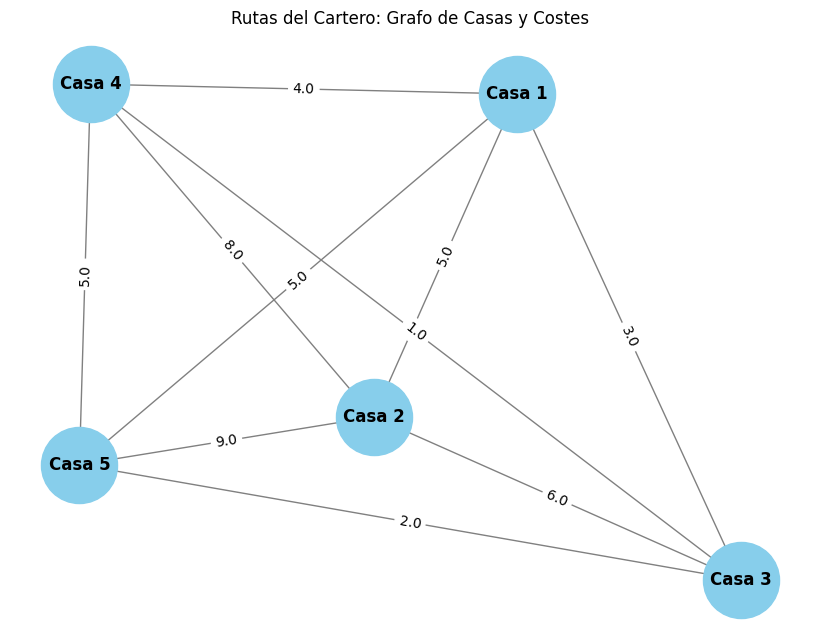


La mejor ruta para el cartero es:
Casa 1 -> Casa 2 -> Casa 4 -> Casa 3 -> Casa 5
Con un coste total de 16.0 unidades.


In [27]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt

# Función para obtener las distancias entre las casas desde el usuario
def obtener_distancias():
    casas = ["Casa 1", "Casa 2", "Casa 3", "Casa 4", "Casa 5"]
    
    G = nx.Graph()
    G.add_nodes_from(casas)
    
    print("Introduce las distancias (costos) entre las casas.")
    print("Escribe 0 si no hay ruta entre dos casas.")
    
    for i in range(len(casas)):
        for j in range(i+1, len(casas)):
            casa1 = casas[i]
            casa2 = casas[j]
            try:
                distancia = float(input(f"Distancia entre {casa1} y {casa2}: "))
                if distancia > 0:
                    G.add_edge(casa1, casa2, weight=distancia)
            except ValueError:
                print("Por favor, ingresa un valor numérico válido.")
    
    return G

# Función para calcular la distancia total de un recorrido dado
def calcular_coste_total(G, recorrido):
    coste_total = 0
    for i in range(len(recorrido) - 1):
        coste_total += G[recorrido[i]][recorrido[i+1]]['weight']
    return coste_total

# Función para calcular la mejor ruta que pase por todas las casas
def encontrar_mejor_ruta(G):
    casas = list(G.nodes)
    
    # Generamos todas las permutaciones posibles de las casas (excepto la casa de inicio)
    permutaciones = itertools.permutations(casas[1:])  # Excluimos la casa de inicio (Casa 1)
    
    mejor_coste = float('inf')
    mejor_ruta = None
    
    # Evaluamos cada permutación posible
    for perm in permutaciones:
        # Combinamos la casa de inicio con la permutación
        ruta_completa = ["Casa 1"] + list(perm)
        
        # Calculamos el coste de esta ruta
        coste = calcular_coste_total(G, ruta_completa)
        
        # Si el coste es menor que el mejor encontrado, actualizamos
        if coste < mejor_coste:
            mejor_coste = coste
            mejor_ruta = ruta_completa
    
    return mejor_ruta, mejor_coste

# Función para graficar el grafo con las distancias
def graficar_grafo(G):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=3000, font_size=12, font_weight="bold", edge_color="gray")
    
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    plt.title("Rutas del Cartero: Grafo de Casas y Costes")
    plt.show()

# Función principal para el flujo interactivo
def cartero_interactivo():
    # Obtener el grafo con las distancias proporcionadas por el usuario
    G = obtener_distancias()
    
    # Graficar el grafo
    graficar_grafo(G)
    
    # Calcular la mejor ruta que pasa por todas las casas
    mejor_ruta, mejor_coste = encontrar_mejor_ruta(G)
    
    # Mostrar la mejor ruta y el coste total
    print("\nLa mejor ruta para el cartero es:")
    print(" -> ".join(mejor_ruta))
    print(f"Con un coste total de {mejor_coste} unidades.")
    
# Ejecutar el flujo interactivo
cartero_interactivo()
